<a href="https://colab.research.google.com/github/Mark5484/sales-forecast-lowcode/blob/main/Low_Code_SuperKart_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

# **Installing and Importing the necessary libraries**

In [2]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

ERROR: Operation cancelled by user


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [2]:
# Uncomment the below snippet of code if the drive needs to be mounted
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
kart = pd.read_csv("https://raw.githubusercontent.com/Mark5484/sales-forecast-lowcode/refs/heads/main/SuperKart%20Data.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
data = kart.copy()

# **Data Overview**

## View the first and last 5 rows of the dataset

In [5]:
data.head() #Complete the code to display the first 5 rows of the dataset

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [6]:
data.tail() #Complete the code to display the last 5 rows of the dataset

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


## Understand the shape of the dataset

In [7]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")


There are 8763 rows and 12 columns.


## Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


## Statistical summary of the data

**Let's check the statistical summary of the data.**

In [10]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for duplicate values

In [11]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

## Checking for missing values

In [12]:
# checking for missing values in the data
data.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### **Product_Weight**

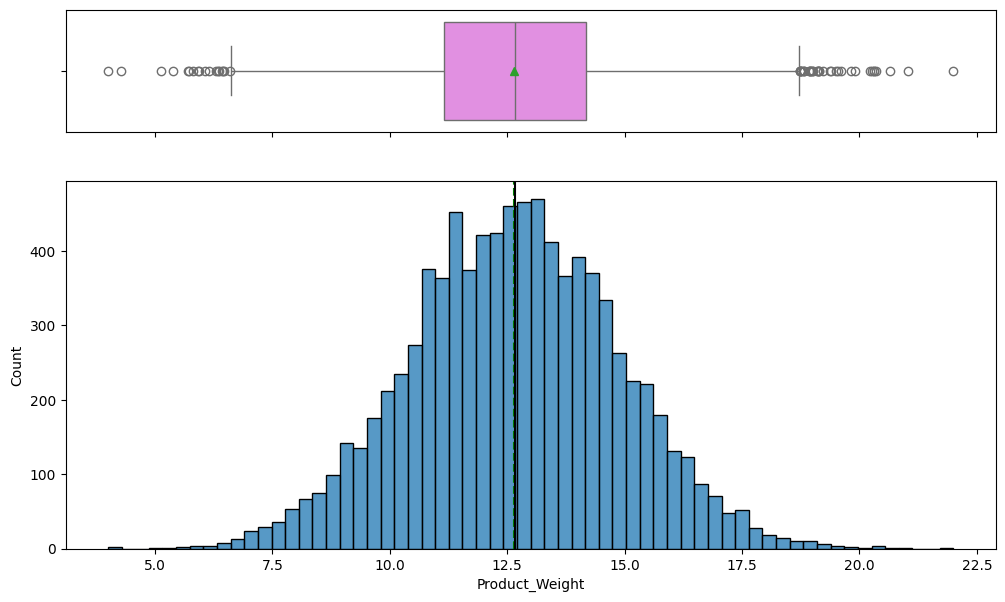

In [14]:
histogram_boxplot(data, "Product_Weight")

### **Product_Allocated_Area**

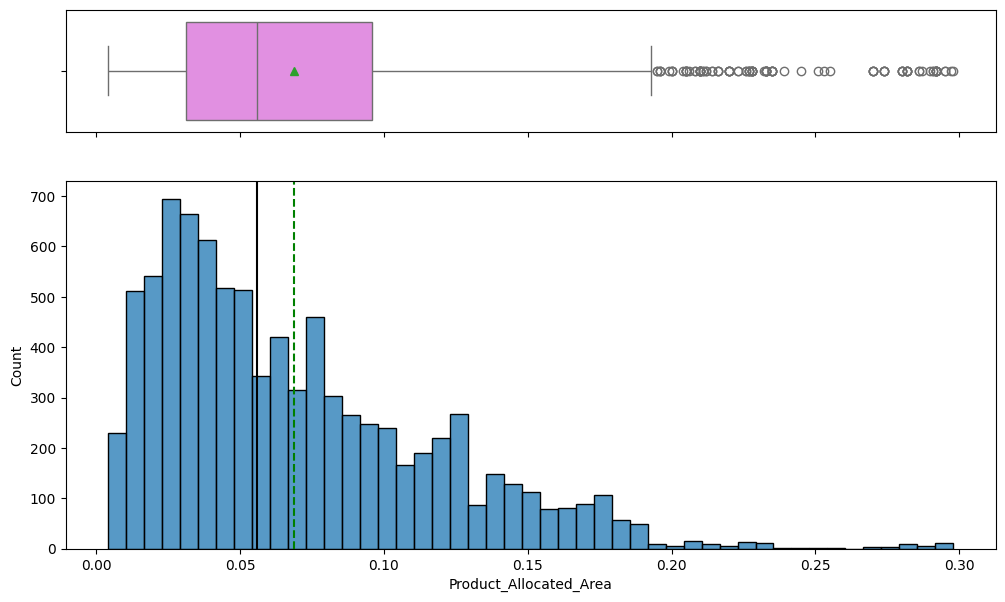

In [16]:
histogram_boxplot(data, "Product_Allocated_Area") #Complete the code to plot the boxplot and histogram of Product_Allocated_Area

### **Product_MRP**

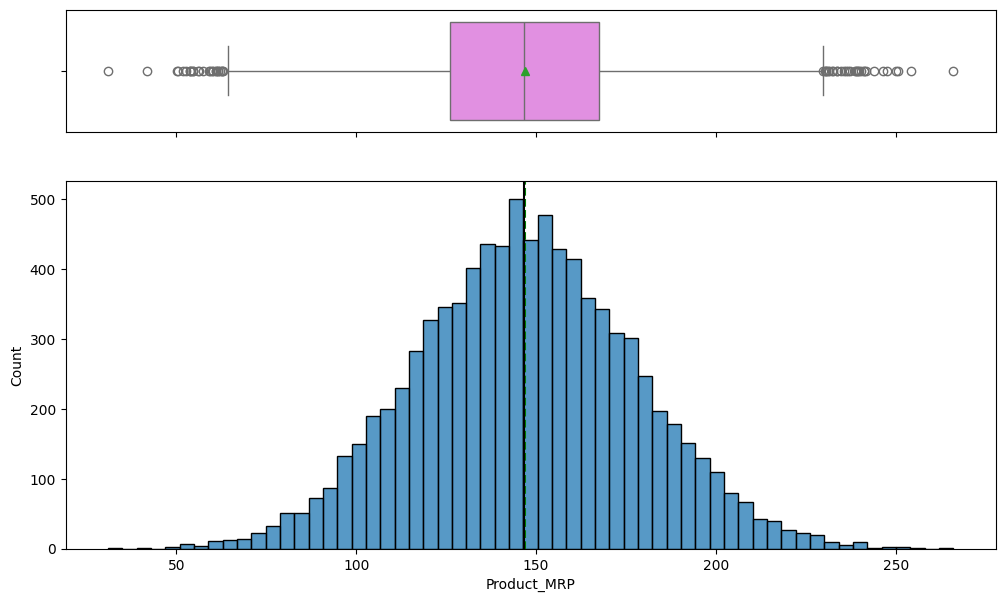

In [17]:
histogram_boxplot(data, "Product_MRP") #Complete the code to plot the boxplot and histogram of Product_MRP

### **Product_Store_Sales_Total**

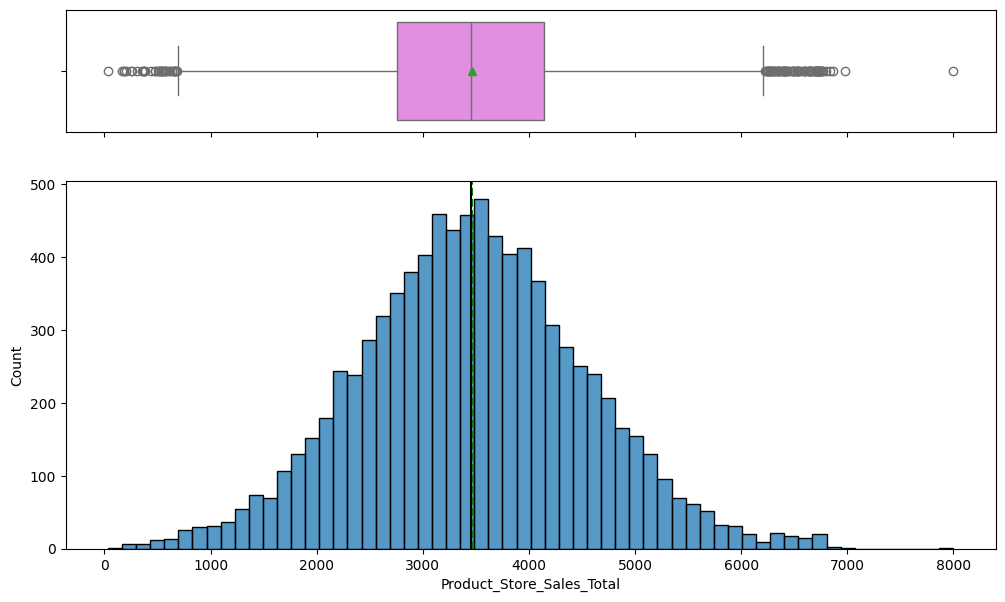

In [18]:
histogram_boxplot(data, "Product_Store_Sales_Total") #Complete the code to plot the boxplot and histogram of Product_Store_Sales_Total

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Product_Sugar_Content**

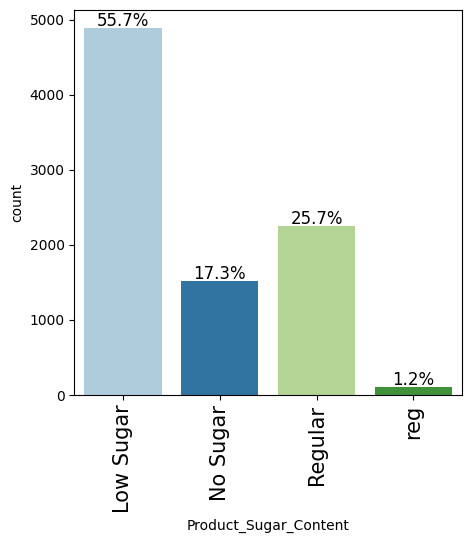

In [20]:
labeled_barplot(data, "Product_Sugar_Content", perc=True)

### **Product_Type**

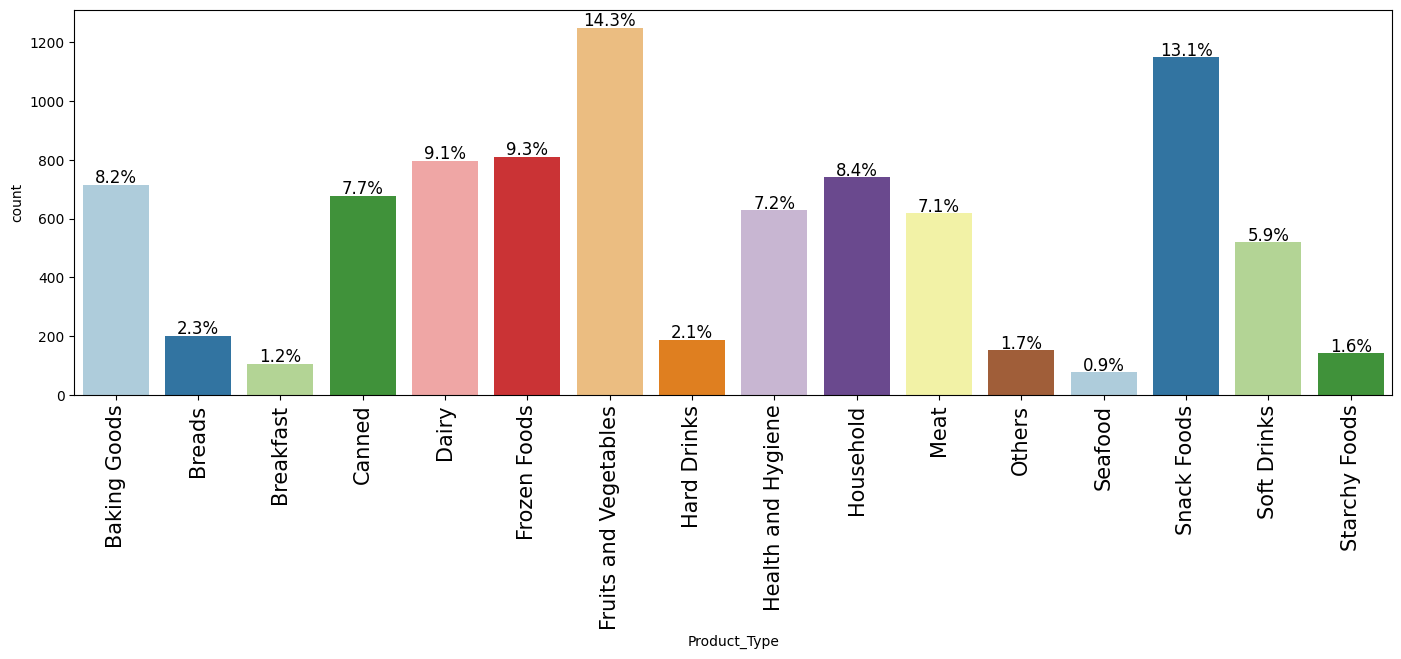

In [22]:
labeled_barplot(data, "Product_Type", perc=True) #Complete the code to plot the labelled barplot of Product_Type with the percentages being displayed

### **Store_Id**

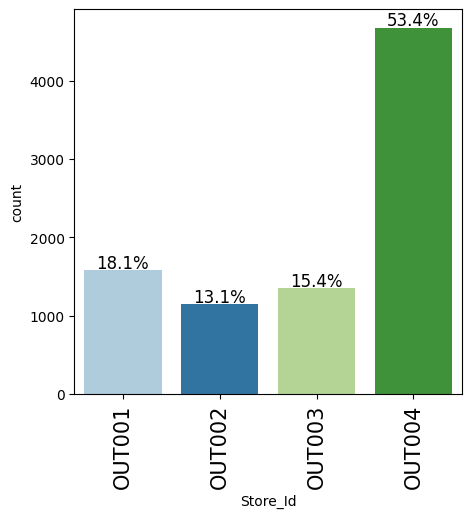

In [25]:
labeled_barplot(data, "Store_Id", perc=True) #Complete the code to plot the labelled barplot of Store_Id with the percentages being displayed

### **Store_Size**

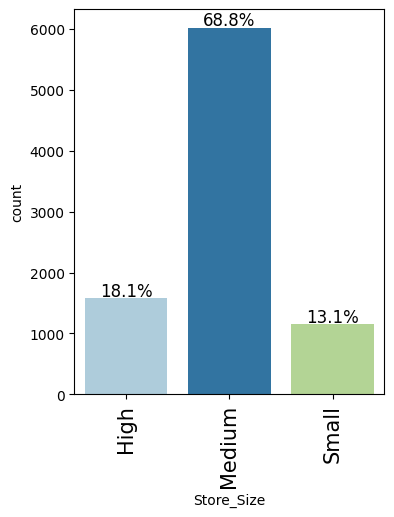

In [26]:
labeled_barplot(data, "Store_Size", perc=True) #Complete the code to plot the labelled barplot of Store_Size with the percentages being displayed

### **Store_Location_City_Type**

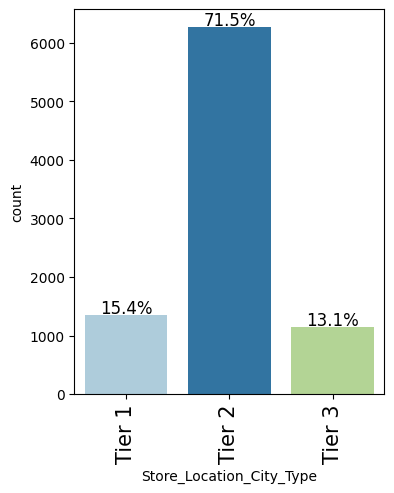

In [27]:
labeled_barplot(data, "Store_Location_City_Type", perc=True) #Complete the code to plot the labelled barplot of Store_Location_City_Type with the percentages being displayed

### **Store_Type**

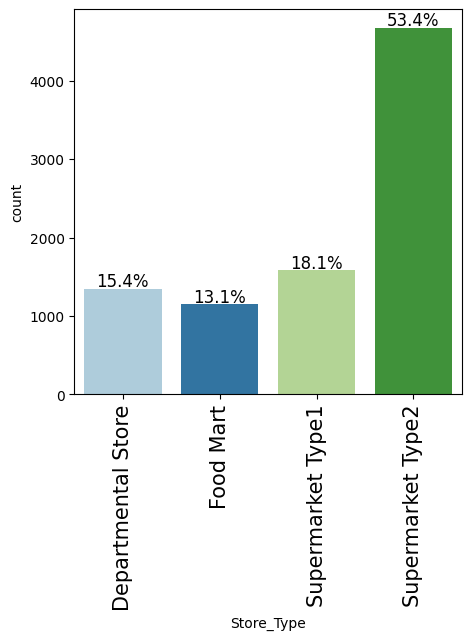

In [28]:
labeled_barplot(data, "Store_Type", perc=True) #Complete the code to plot the labelled barplot of Store_Type with the percentages being displayed

## Bivariate Analysis

### **Correlation matrix**

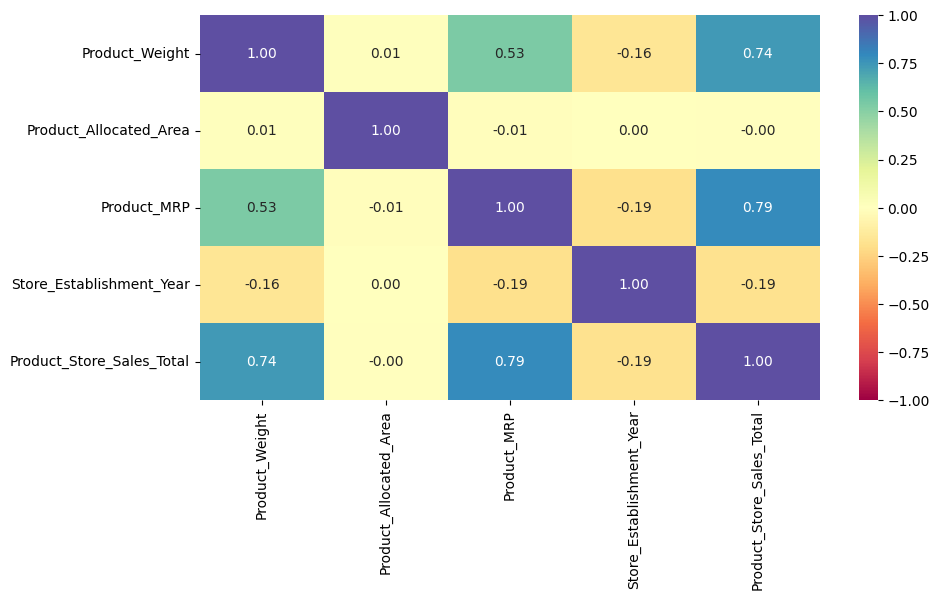

In [29]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### **Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

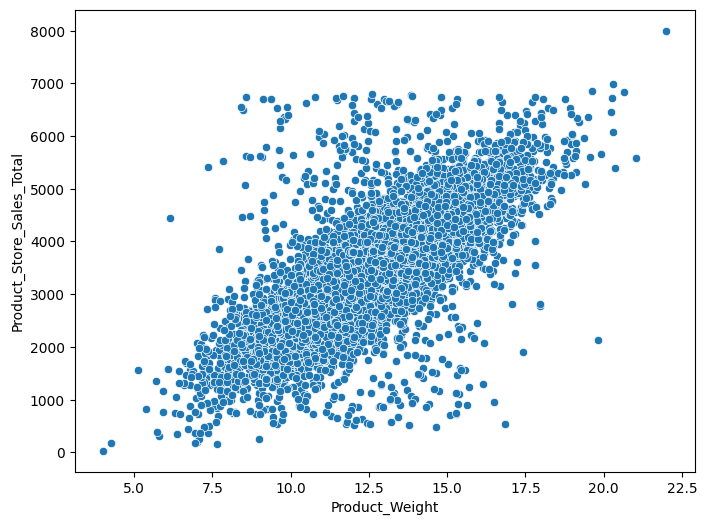

In [30]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Weight, y=data.Product_Store_Sales_Total)
plt.show()

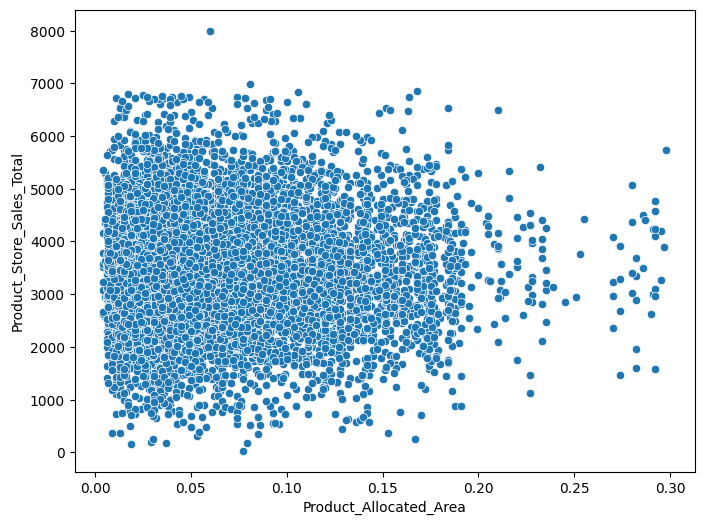

In [33]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Allocated_Area, y=data.Product_Store_Sales_Total) #Complete the code to plot a scatterplot of Product_Allocated_Area and Product_Store_Sales_Total
plt.show()

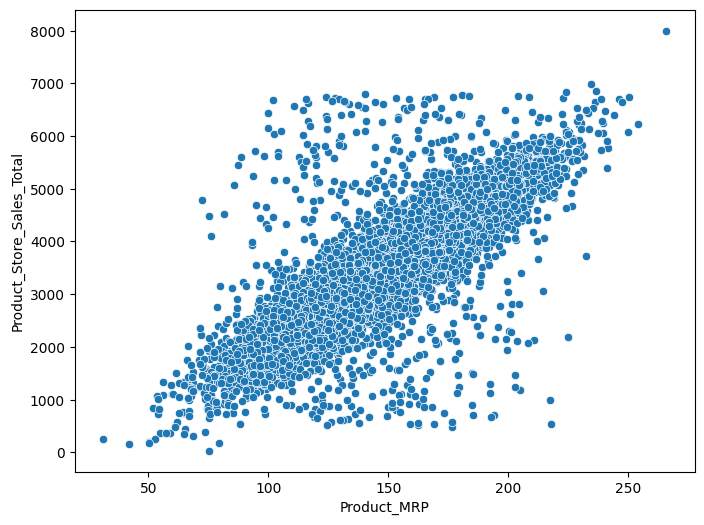

In [34]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_MRP, y=data.Product_Store_Sales_Total) #Complete the code to plot a scatterplot of Product_MRP and Product_Store_Sales_Total
plt.show()

### **Let us see from which product type the company is generating most of the revenue**

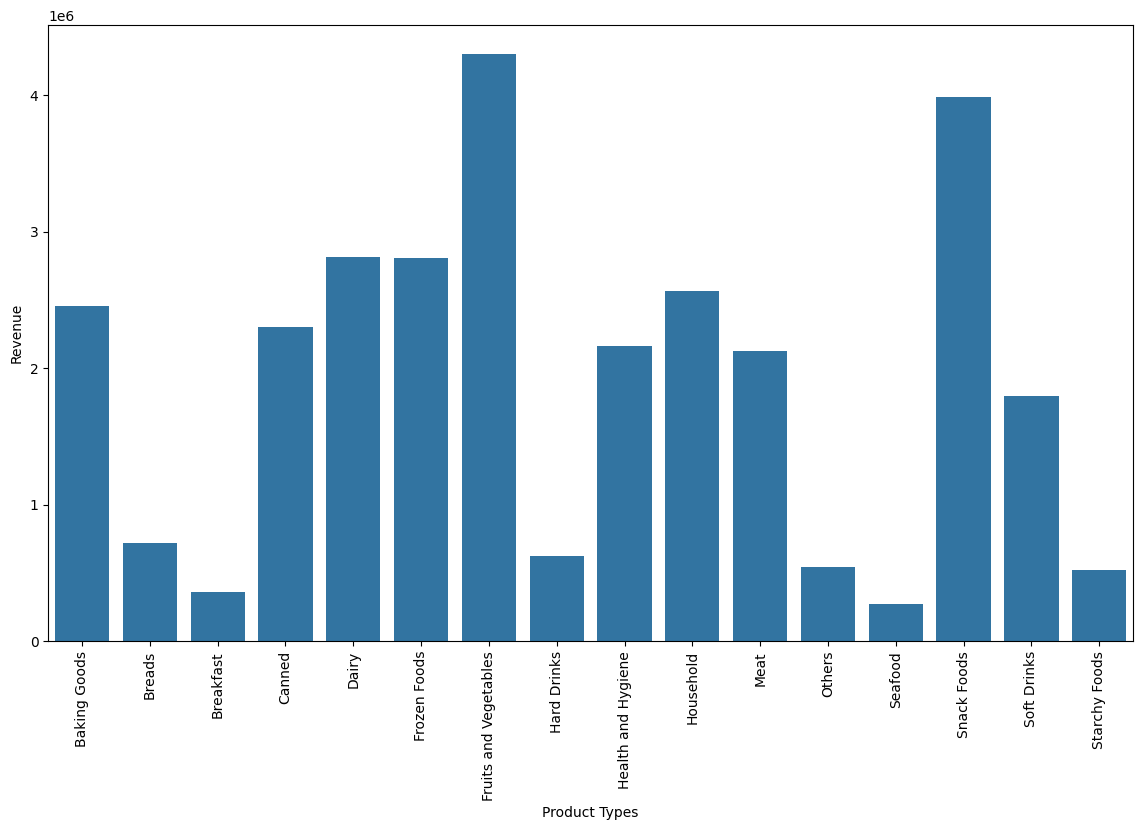

In [35]:
df_revenue1 = data.groupby(["Product_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.Product_Type, y=df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

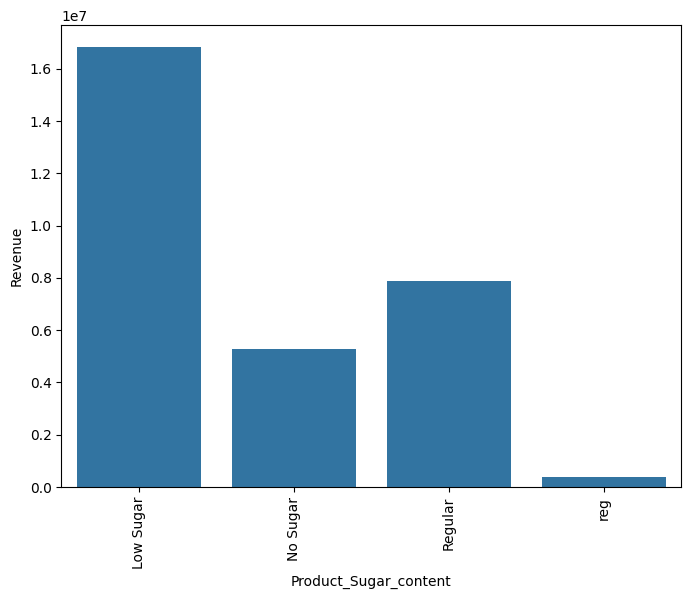

In [37]:
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()  #Complete the code to perform a groupby on Product_Sugar_Content and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
b = sns.barplot(
    x=df_revenue2.Product_Sugar_Content, y=df_revenue2.Product_Store_Sales_Total
)
b.set_xlabel("Product_Sugar_content")
b.set_ylabel("Revenue")
plt.show()

### **Let us see from which type of stores and locations the revenue generation is more**.

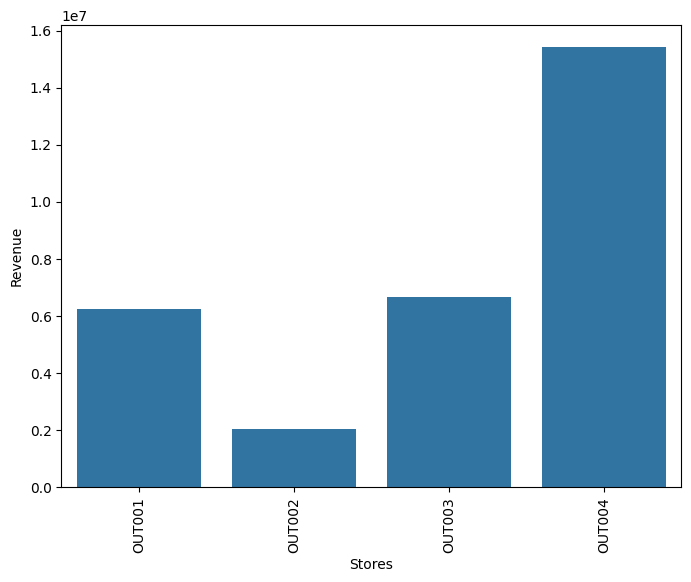

In [38]:
df_store_revenue = data.groupby(["Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum() #Complete the code to perform a groupby on Store_Id and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
r = sns.barplot(
    x=df_store_revenue.Store_Id, y=df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()

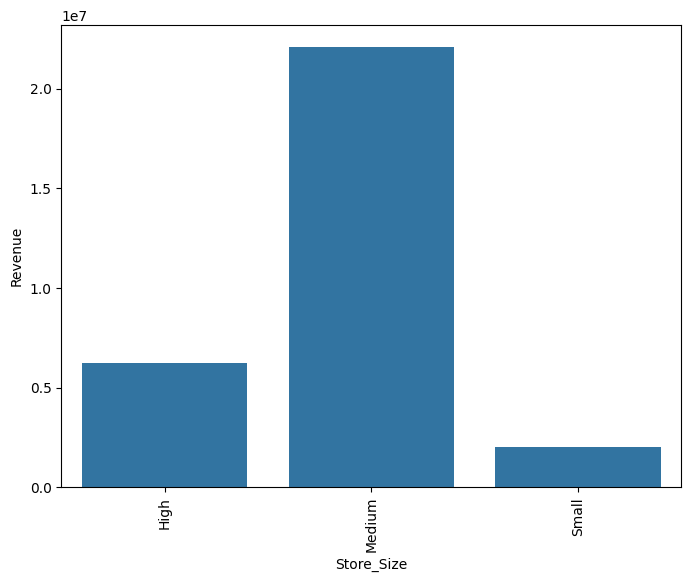

In [39]:
df_revenue3 = data.groupby(["Store_Size"], as_index=False)[
    "Product_Store_Sales_Total"
].sum() #Complete the code to perform a groupby on Store_Size and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
c = sns.barplot(x=df_revenue3.Store_Size, y=df_revenue3.Product_Store_Sales_Total)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()

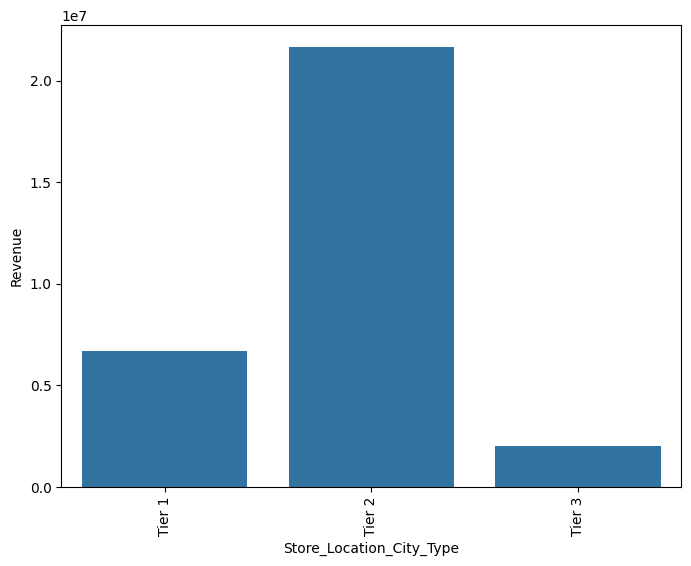

In [40]:
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum() #Complete the code to perform a groupby on Store_Location_City_Type and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
d = sns.barplot(
    x=df_revenue4.Store_Location_City_Type, y=df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

In [ ]:
df_revenue5 = data.groupby(["_____"], as_index=False)[
    "_____"
].sum() #Complete the code to perform a groupby on Store_Type and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
e = sns.barplot(x=df_revenue5.Store_Type, y=df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

### **Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Id", y="Product_Store_Sales_Total", hue = "Store_Id")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = data, x = "_____", y = "_____", hue = "_____") #Complet the code to plot the boxplot with x as Store_Size , y as Product_Store_Sales_Total and hue as Store_Size
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

### **Let's now try to find out some relationship between the other columns**

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = data, x = "_____", y = "_____", hue = "_____") #Complete the code to plot the boxplot with x as Product_Type , y as Product_Weight and hue as Product_Type
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_Weight")
plt.xlabel("Types of Products")
plt.ylabel("Product_Weight")
plt.show()

### **Let's find out whether there is some relationship between the weight of the product and its sugar content**

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = data, x = "_____", y = "_____", hue = "_____") #Complete the code to plot the boxplot with x as Product_Sugar_Content , y as Product_Weight and hue as Product_Sugar_Content
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")
plt.xlabel("Product_Sugar_Content")
plt.ylabel("Product_Weight")
plt.show()

### **Let's analyze the sugar content of different product types**

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

### **Let's find out how many items of each product type has been sold in each of the stores**

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["_____"], data["_____"]), #Complete the code to perform a crosstab operation between Store_Id and Product_Type
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Stores")
plt.xlabel("Product_Type")
plt.show()

### **Different product types have different prices. Let's analyze the trend.**

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = data, x = "_____", y = "_____", hue = "_____") #Complete the code to plot a boxplot with x as Product_Type , y as Product_MRP and hue as Product_Type
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")
plt.show()

### **Let's find out how the Product_MRP varies with the different stores**

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = data, x = "_____", y = "_____", hue = "_____") #Complete the code to plot the boxplot with x as Store_Id , y as Product_MRP and hue as Store_Id
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_MRP")
plt.xlabel("Stores")
plt.ylabel("Product_MRP (of each product)")
plt.show()

### **Let's delve deeper and do a detailed analysis of each of the stores**.

#### OUT001

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include="all").T

**Observations**
- OUT001 is a store of Supermarket Type 1 which is located in a Tier 2 city and has store size as high. It was established in 1987.
- OUT001 has sold products whose MRP range from 71 to 227.
- Snack Foods have been sold the highest number of times in OUT001.
- The revenue generated from each product at OUT001 ranges from 2300 to 5000.

In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

**OUT001 has generated total revenue of 6223113 from the sales of goods.**

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

- OUT001 has generated the highest revenue from the sale of fruits and vegetables and snack foods. Both the categories have contributed around 800000 each.

#### OUT002

In [ ]:
data.loc[data["Store_Id"] == "OUT002"].describe(include="all").T

**Observations**
- OUT002 is a food mart which is located in a Tier 3 city and has store size as small. It was established in 1998.
- OUT002 has sold products whose MRP range from 31 to 225.
- Fruits and vegetables have been sold the highest number of times in OUT002.
- The revenue generated from each product at OUT002 ranges from 33 to 2300.

In [ ]:
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

**OUT002 has generated total revenue of 2030910 from the sales of goods.**

In [ ]:
df_OUT002 = (
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x=df_OUT002.Product_Type, y=df_OUT002.Product_Store_Sales_Total)
plt.show()

- OUT002 has generated the highest revenue from the sale of fruits and vegetables (~ 300000) followed by snack foods (~ 250000).

#### OUT003

In [ ]:
data.loc[data["Store_Id"] == "OUT003"].describe(include="all").T

**Observations**
- OUT003 is a Departmental store which is located in a Tier 1 city and has store size as medium. It was established in 1999.
- OUT003 has sold products whose MRP range from 86 to 266.
- Snack Foods have been sold the highest number of times in OUT003.
- The revenue generated from each product at OUT003 ranges from 3070 to 8000.

In [ ]:
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

**OUT003 has generated total revenue of 6673458 from the sales of goods.**

In [ ]:
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")
sns.barplot(x=df_OUT003.Product_Type, y=df_OUT003.Product_Store_Sales_Total)
plt.show()

- OUT003 has generated the highest revenue from the sale of snack foods followed by fruits and vegetables, both the categories contributing around 800000 each.

#### OUT004

In [ ]:
data.loc[data["Store_Id"] == "OUT004"].describe(include="all").T

**Observations**
- OUT004 is a store of Supermarket Type2 which is located in a Tier 2 city and has store size as medium. It was established in 2009.
- OUT004 has sold products whose MRP range from 83 to 198.
- Fruits and vegetables have been sold the highest number of times in OUT004.
- The revenue generated from each product at OUT004 ranges from 1561 to 5463.

In [ ]:
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

**OUT004 has generated total revenue of 15427583 from the sales of goods which is highest among all the 4 stores.**

In [ ]:
df_OUT004 = (
    data.loc[data["Store_Id"] == "OUT004"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")
sns.barplot(x=df_OUT004.Product_Type, y=df_OUT004.Product_Store_Sales_Total)
plt.show()

- OUT004 has generated the highest revenue from the sale of fruits and vegetables (~ 2500000) followed by snack foods (~ 2000000).

**Let's find out the revenue generated by the stores from each of the product types**.

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df1

- In all the product types, the revenue generated by OUT004 has been the highest which seems quite logical since around 53% of the total products were brought from this store.
- In all the product categories, the revenue generated by OUT002 has been the lowest which seems quite obvious since it is small store in a Tier 3 city.

**Let's find out the revenue generated by the stores from products having different levels of sugar content**.

In [ ]:
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df2

- The trend is the same as that which was present in the revenue analysis of stores for product types.

# **Data Preprocessing**

## **Replacing the values in the Product_Sugar_Content column**

We can observe that in the Product_Sugar_Content column, there are 3 types - Low Sugar, Regular and reg.

It seems quite obvious that Regular and reg are referring to the same category. So let's replace reg with Regular.

In [ ]:
# Replacing reg with Regular
data.Product_Sugar_Content.replace(to_replace=["reg"], value=["Regular"], inplace=True)

In [ ]:
data.Product_Sugar_Content.value_counts()

## **Exploring Patterns in Product_IDs**

We can see that the Product_Id column has two characters followed by a number.

Let's delve deeper and see whether they are having any relationship with the other columns or not

In [ ]:
## extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]
data.head()

In [ ]:
data["Product_Id_char"].unique()

In [ ]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

In [ ]:
data.loc[data.Product_Id_char == "_____+", "Product_Type"].unique() #Complete the code to select the rows where Product_Id_char is DR

In [ ]:
data.loc[data.Product_Id_char == "_____", "Product_Type"].unique() #Complete the code to select the rows where Product_Id_char is NC

## **Store's Age**

A store which has been in the business for a long duration is more trustworthy than the newly established ones.

On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2025 - data.Store_Establishment_Year

## **Grouping Product Types into Perishables and Non-Perishables.**

We have 16 different product types in our dataset.

So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"

In [ ]:
data['Product_Type_Category'] = data['Product_Type'].apply(change)

In [ ]:
data.head()

## **Outlier Check**

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## **Data Preparation for Modeling**

- We aim to forecast the Product_Store_Sales_Total.

- Before building the model, we'll drop unnecessary columns and encode the categorical features.

- We'll then split the data into training and testing sets to evaluate the model's performance on unseen data.

In [ ]:
data.head()

Let's remove the columns that are not required.

In [ ]:
data = data.drop(["_____"], axis=1) #Complete the code to drop the columns "Product_Id","Product_Type","Store_Id","Store_Establishment_Year"

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
# Separating features and the target column
X = data.drop("_____", axis=1) #Complete the code to drop the target variable
y = data["_____"] #Complete the code to select the target variable

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=_____, random_state=1, shuffle=True #Complete the code to define the test_size
)

In [ ]:
X_train.shape, X_test.shape

### **Data Pre-processing Pipeline**

In [ ]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

In [ ]:
# Create a preprocessing pipeline for the categorical features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

# **Model Building**

<h2><b>Note: As per the rubric, you are required to build two ML models for this project. We have provided the code required for model building for six different ML models, each under a separate markdown section.  You may choose any two models from the ones provided below, uncomment the corresponding code for the model, and then run the code to build the model, and check its performance.</b></h2>

## Define functions for Model Evaluation

- We'll fit different models on the train data and observe their performance.
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

## Decision Tree Model

In [ ]:
# Uncomment the below snippet of code if decision tree regressor is to be used

# dtree = DecisionTreeRegressor(random_state=1)
# dtree = make_pipeline(preprocessor,dtree)
# dtree.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# Uncomment the below snippet of code if decision tree regressor is to be used

#dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
#dtree_model_train_perf

### Checking model performance on test set

In [ ]:
# Uncomment the below snippet of code if decision tree regressor is to be used

#dtree_model_test_perf = model_performance_regression(dtree, X_test, y_test)
#dtree_model_test_perf

## Bagging Regressor

In [ ]:
# Uncomment the below snippet of code if baggingregressor is to be used

#bagging_regressor = BaggingRegressor(random_state=1)
#bagging_regressor = make_pipeline(preprocessor,bagging_regressor)
#bagging_regressor.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# Uncomment the below snippet of code if baggingregressor is to be used

#bagging_regressor_model_train_perf = model_performance_regression(bagging_regressor, X_train, y_train)
#bagging_regressor_model_train_perf

### Checking model performance on test set

In [ ]:
# Uncomment the below snippet of code if baggingregressor is to be used

#bagging_regressor_model_test_perf = model_performance_regression(bagging_regressor, X_test, y_test)
#bagging_regressor_model_test_perf

## Random Forest Model

In [ ]:
# Uncomment the below snippet of code if random forest regressor is to be used

#rf_estimator = RandomForestRegressor(random_state=1)
#rf_estimator = make_pipeline(preprocessor,rf_estimator)
#rf_estimator.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# Uncomment the below snippet of code if random forest regressor is to be used

#rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train, y_train)
#rf_estimator_model_train_perf

### Checking model performance on test set

In [ ]:
# Uncomment the below snippet of code if random forest regressor is to be used

#rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test, y_test)
#rf_estimator_model_test_perf

## AdaBoost Regressor

In [ ]:
# Uncomment the below snippet of code if adaboost regressor is to be used

#ab_regressor = AdaBoostRegressor(random_state=1)
#ab_regressor = make_pipeline(preprocessor,ab_regressor)
#ab_regressor.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# Uncomment the below snippet of code if adaboost regressor is to be used

#ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train, y_train)
#ab_regressor_model_train_perf

### Checking model performance on test set

In [ ]:
# Uncomment the below snippet of code if adaboost regressor is to be used

#ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test, y_test)
#ab_regressor_model_test_perf

## Gradient Boosting Regressor

In [ ]:
# Uncomment the below snippet of code if gradientboost regressor is to be used

#gb_estimator = GradientBoostingRegressor(random_state=1)
#gb_estimator = make_pipeline(preprocessor,gb_estimator)
#gb_estimator.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# Uncomment the below snippet of code if gradientboost regressor is to be used

#gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train, y_train)
#gb_estimator_model_train_perf

### Checking model performance on test set

In [ ]:
# Uncomment the below snippet of code if gradientboost regressor is to be used

#gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
#gb_estimator_model_test_perf

## XGBoost Regressor

In [ ]:
# Uncomment the below snippet of code if xgboost regressor is to be used

#xgb_estimator = XGBRegressor(random_state=1)
#xgb_estimator = make_pipeline(preprocessor,xgb_estimator)
#xgb_estimator.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# Uncomment the below snippet of code if xgboost regressor is to be used

#xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
#xgb_estimator_model_train_perf

### Checking model performance on test set

In [ ]:
# Uncomment the below snippet of code if xgboost regressor is to be used

#xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test, y_test)
#xgb_estimator_model_test_perf

# **Model Performance Improvement - Hyperparameter Tuning**

<h2><b>Note:</b></h2>

<h2><b>1. As per the rubric, you are required to tune two ML models for this project. We have provided the code required for model building for six different ML models, each under a separate markdown section.  You may choose the two models you built previously, uncomment the corresponding code for the model, and then run the code to tune the model, and check its performance.</b></h2>
<h2><b>2. We've provided a sample parameter grid for tuning. You may add/remove parameters or parameter values to check for during tuning as per your requirements.</b></h2>

## Hyperparameter Tuning - Decision Tree

In [ ]:
# Uncomment the below snippet of code if decision tree regressor is to be used

# # Choose the type of classifier.
# dtree_tuned = DecisionTreeRegressor(random_state=1)
# dtree_tuned = make_pipeline(preprocessor,dtree_tuned)

# # Grid of parameters to choose from
# parameters = {
#     "decisiontreeregressor__max_depth": list(np.arange(2, 6)),
#     "decisiontreeregressor__min_samples_leaf": [1, 3, 5],
#     "decisiontreeregressor__max_leaf_nodes": [2, 3, 5, 10, 15],
#     "decisiontreeregressor__min_impurity_decrease": [0.001, 0.01, 0.1],
# }

# # Run the grid search
# grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=r2_score, cv=3, n_jobs =-1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# dtree_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# dtree_tuned.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
# Uncomment the below snippet of code if decision tree regressor is to be used

#dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train, y_train)
#dtree_tuned_model_train_perf

### Checking model performance on test set

In [ ]:
# Uncomment the below snippet of code if decision tree regressor is to be used

#dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test, y_test)
#dtree_tuned_model_test_perf

## Hyperparameter Tuning - Bagging Regressor

In [ ]:
#Uncomment the below snippet of code if bagging regressor is to be used

# # Choose the type of regressor.
# bagging_estimator_tuned = BaggingRegressor(random_state=1)
# bagging_estimator_tuned = make_pipeline(preprocessor,bagging_estimator_tuned)

# # Grid of parameters to choose from
# parameters = {
#     "baggingregressor__max_samples": ______, #Complete the code to define the list of values to be tuned
#     "baggingregressor__max_features": _____, #Complete the code to define the list of values to be tuned
#     "baggingregressor__n_estimators": _____, #Complete the code to define the list of values to be tuned
# }

# # Run the grid search
# grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# bagging_estimator_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# bagging_estimator_tuned.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
#Uncomment the below snippet of code if bagging regressor is to be used


# bagging_estimator_tuned_model_train_perf = model_performance_regression(bagging_estimator_tuned, X_train, y_train)
# bagging_estimator_tuned_model_train_perf

### Checking model performance on test set

In [ ]:
#Uncomment the below snippet of code if bagging regressor is to be used

# bagging_estimator_tuned_model_test_perf = model_performance_regression(bagging_estimator_tuned, X_test, y_test)
# bagging_estimator_tuned_model_test_perf

## Hyperparameter Tuning - Random Forest

In [ ]:
#Uncomment the below snippet of code if random forest regressor is to be used


# # Choose the type of classifier.
# rf_tuned = RandomForestRegressor(random_state=1)
# rf_tuned = make_pipeline(preprocessor,rf_tuned)

# # Grid of parameters to choose from
# parameters = {
#     "randomforestregressor__max_depth": ______, #Complete the code to define the list of values to be tuned
#     "randomforestregressor__max_features":______, #Complete the code to define the list of values to be tuned
#     "randomforestregressor__n_estimators": ______, #Complete the code to define the list of values to be tuned
# }

# # Run the grid search
# grid_obj = GridSearchCV(rf_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# rf_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# rf_tuned.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
#Uncomment the below snippet of code if random forest regressor is to be used

# rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
# rf_tuned_model_train_perf

### Checking model performance on test set

In [ ]:
#Uncomment the below snippet of code if random forest regressor is to be used

# rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
# rf_tuned_model_test_perf

## Hyperparameter Tuning - AdaBoost Regressor

In [ ]:
#Uncomment the below snippet of code if adaboost regressor is to be used

# # Choose the type of classifier.
# ab_tuned = AdaBoostRegressor(random_state=1)
# ab_tuned = make_pipeline(preprocessor,ab_tuned)
# # Grid of parameters to choose from
# parameters = {
#     "adaboostregressor__n_estimators": _____, #Complete the code to define the list of values to be tuned
#     "adaboostregressor__learning_rate": _____, #Complete the code to define the list of values to be tuned
# }


# # Run the grid search
# grid_obj = GridSearchCV(ab_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# ab_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# ab_tuned.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
#Uncomment the below snippet of code if adaboost regressor is to be used

# ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train, y_train)
# ab_tuned_model_train_perf

### Checking model performance on test set

In [ ]:
#Uncomment the below snippet of code if adaboost regressor is to be used

# ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test, y_test)
# ab_tuned_model_train_perf

## Hyperparameter Tuning - Gradient Boosting Regressor

In [ ]:
#Uncomment the below snippet of code if gradientboost regressor is to be used


# # Choose the type of classifier.
# gb_tuned = GradientBoostingRegressor(random_state=1)
# gb_tuned = make_pipeline(preprocessor,gb_tuned)

# # Grid of parameters to choose from
# parameters = {
#     "gradientboostingregressor__n_estimators": _____, #Complete the code to define the list of values to be tuned
#     "gradientboostingregressor__subsample": _____, #Complete the code to define the list of values to be tuned
#     "gradientboostingregressor__max_features": _____, #Complete the code to define the list of values to be tuned
#     "gradientboostingregressor__max_depth": _____, #Complete the code to define the list of values to be tuned
# }


# # Run the grid search
# grid_obj = GridSearchCV(gb_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# gb_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# gb_tuned.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
#Uncomment the below snippet of code if gradientboost regressor is to be used

# gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train, y_train)
# gb_tuned_model_train_perf

### Checking model performance on test set

In [ ]:
#Uncomment the below snippet of code if gradientboost regressor is to be used

# gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
# gb_tuned_model_test_perf

## Hyperparameter Tuning - XGBoost Regressor

In [ ]:
#Uncomment the below snippet of code if xgboost regressor is to be used


# # Choose the type of classifier.
# xgb_tuned = XGBRegressor(random_state=1)
# xgb_tuned = make_pipeline(preprocessor,xgb_tuned)

# # Grid of parameters to choose from
# parameters = {
#     "xgbregressor__n_estimators": _____, #Complete the code to define the list of values to be tuned
#     "xgbregressor__subsample": _____, #Complete the code to define the list of values to be tuned
#     "xgbregressor__gamma": _____, #Complete the code to define the list of values to be tuned
#     "xgbregressor__colsample_bytree": _____, #Complete the code to define the list of values to be tuned
#     "xgbregressor__colsample_bylevel": _____, #Complete the code to define the list of values to be tuned
# }

# # Run the grid search
# grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# xgb_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# xgb_tuned.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
#Uncomment the below snippet of code if xgboost regressor is to be used

# xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
# xgb_tuned_model_train_perf

### Checking model performance on test set

In [ ]:
#Uncomment the below snippet of code if xgboost regressor is to be used

# xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
# xgb_tuned_model_test_perf

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
 # training performance comparison

models_train_comp_df = pd.concat(
    [
        _____.T, #Complete the code to define the variable name of the dataframe which stores the train performance metrics of the first model you have choosen . Eg, rf_model_train_perf
        _____.T, #Complete the code to define the variable name of the dataframe which stores the train performance metrics of the first model (tuned) you have choosen
        _____.T, #Complete the code to define the variable name of the dataframe which stores the train performance metrics of the second model you have choosen
        _____.T, #Complete the code to define the variable name of the dataframe which stores the train performance metrics of the second model (tuned) you have choosen
    ],
    axis=1,
)

models_train_comp_df.columns = ["_____"] #Complete the code to define the names for the models

print("Training performance comparison:")
models_train_comp_df

In [ ]:
 # training performance comparison

models_train_comp_df = pd.concat(
    [
        _____.T, #Complete the code to define the variable name of the dataframe which stores the test performance metrics of the first model you have choosen . Eg, rf_model_test_perf
        _____.T, #Complete the code to define the variable name of the dataframe which stores the test performance metrics of the first model (tuned) you have choosen
        _____.T, #Complete the code to define the variable name of the dataframe which stores the test performance metrics of the second model you have choosen
        _____.T, #Complete the code to define the variable name of the dataframe which stores the test performance metrics of the second model (tuned) you have choosen
    ],
    axis=1,
)

models_train_comp_df.columns = ["_____"] #Complete the code to define the names for the models

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("_____", exist_ok=True) #Complete the code to define the folder name where the files related to the backend will be stored.

In [ ]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "_____/_____.joblib" #Complete the code to define the name of the model

In [ ]:
# Save the best trained model pipeline using joblib
joblib.dump(_____, saved_model_path) #Complete the code to pass the variable name of the best model

print(f"Model saved successfully at {saved_model_path}")

In [ ]:
# Load the saved model pipeline from the file
saved_model = joblib.load("_____/_____.joblib") #Complete the code to define the name of the model

# Confirm the model is loaded
print("Model loaded successfully.")

In [ ]:
saved_model

Let's try making predictions on the test set using the deserialized model.

- Please ensure that the saved model is loaded before making predictions.

In [ ]:
saved_model.predict(_____) #Complete the code to pass the X_test for inference

- As we can see, the model can be directly used for making predictions without any retraining.

# **Deployment - Backend**

## Flask Web Framework


In [ ]:
%%writefile _____/app.py # Complete the code to define the name of the folder where the files related to backend are stored. Once it has been mentioned, remove the comment.

# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize Flask app with a name
superkart_api = Flask("_____") #Complete the code to define the name of the app

# Load the trained churn prediction model
model = joblib.load("_____") #Complete the code to define the location of the serialized model

# Define a route for the home page
@superkart_api.get('/')
def home():
    return "_____" #Complete the code to define a welcome message

# Define an endpoint to predict churn for a single customer
@superkart_api.post('/v1/predict')
def predict_sales():
    # Get JSON data from the request
    data = request.get_json()

    # Extract relevant customer features from the input data. The order of the column names matters.
    sample = {
        'Product_Weight': data['Product_Weight'],
        'Product_Sugar_Content': data['Product_Sugar_Content'],
        'Product_Allocated_Area': data['Product_Allocated_Area'],
        'Product_MRP': data['Product_MRP'],
        'Store_Size': data['Store_Size'],
        'Store_Location_City_Type': data['Store_Location_City_Type'],
        'Store_Type': data['Store_Type'],
        'Product_Id_char': data['Product_Id_char'],
        'Store_Age_Years': data['Store_Age_Years'],
        'Product_Type_Category': data['Product_Type_Category']
    }

    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a churn prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Return the prediction as a JSON response
    return jsonify({'Sales': prediction})


# Run the Flask app in debug mode
if __name__ == '__main__':
    superkart_api.run(debug=True)

## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2

## Dockerfile

In [ ]:
%%writefile _____/Dockerfile #Complete the code to define the name of the folder where the files related to backend are stored. Once it has been mentioned, remove the comment.
FROM python:3.9-slim

# Set the working directory inside the container
_____ /app #Complete the code to mention the command in Docker to set the working directory

# Copy all files from the current directory to the container's working directory
_____ . . #Complete the code to mention the command in Docker to copy the files from the current directory to the container's working directory

# Install dependencies from the requirements file without using cache to reduce image size
_____ pip install --no-cache-dir --upgrade -r requirements.txt #Complete the code to mention the command in Docker to install dependencies

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:superkart_api"]

## Setting up a Hugging Face Docker Space for the Backend

**Note**: We are creating a Hugging Face Docker Space for our backend using the Hugging Face Hub API. This automates the space creation process and enables seamless deployment of our Flask app.

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login

# Login to your Hugging Face account using your access token
# Replace "YOUR_HUGGINGFACE_TOKEN" with your actual token
#login(token="YOUR_HUGGINGFACE_TOKEN")  # You can get your token from https://huggingface.co/settings/tokens
login(token="_____") #Complete the code to define the access token

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("_____",  #Complete the code to define the name of the repository
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker"
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

## Uploading Files to Hugging Face Space (Docker Space)

**Note**: Before running the code below, ensure that the serialized ML model has been uploaded in to `backend_files` folder.

In [ ]:
# for hugging face space authentication to upload files

access_key = "_____"  #Complete the code to define the access token
repo_id = "_____"  #Complete the code to define the repo id.

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="_____",  #Complete the code to define the foldername where the backend fiels have been stored
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

# **Deployment - Frontend**

## Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("_____", exist_ok=True) #Complete the code to define the folder name where the files related to the frontend system will be stored

In [ ]:
%%writefile _____/app.py #Complete the code to define the name of the folder where the files related to frontend are stored. Once it has been mentioned, remove the comment.

import streamlit as st
import requests

st.title("_____") #Complete the code to define the title of the app.

# Input fields for product and store data
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=12.66)
Product_Sugar_Content = st.selectbox("Product Sugar Content", ["Low Sugar", "Regular", "No Sugar"])
Product_Allocated_Area = ______ #Complete the code to define the UI element for Product_Allocated_Area
Product_MRP = ______ #Complete the code to define the UI element for Product_MRP
Store_Size = _____ ______ #Complete the code to define the UI element for Store_Size
Store_Location_City_Type = _____ ______ #Complete the code to define the UI element for Store_Location_City_Type
Store_Type = _____ ______ #Complete the code to define the UI element for Store_Type
Product_Id_char = _____ ______ #Complete the code to define the UI element for Product_Id_char
Store_Age_Years = _____ ______ #Complete the code to define the UI element for Store_Age_Years
Product_Type_Category = _____ ______ #Complete the code to define the UI element for Product_Type_Category

product_data = {
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_MRP": Product_MRP,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
    "Product_Id_char": Product_Id_char,
    "Store_Age_Years": Store_Age_Years,
    "Product_Type_Category": Product_Type_Category
}

if st.button("Predict", type='primary'):
    response = requests.post("https://<user_name>-<space_name>.hf.space/v1/predict", json=product_data)    # Complete the code to enter user name and space name to correctly define the endpoint
    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Sales"]
        st.write(f"Predicted Product Store Sales Total: ₹{predicted_sales:.2f}")
    else:
        st.error("Error in API request")

## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
requests==2.32.3

## Setting up a HuggingFace Streamlit Space for the Frontend

**Note**: We are creating a Hugging Face Streamlit Space for our frontend, similar to the backend Flask app, using the Hugging Face Hub API. This approach ensures automation in the space creation process and enables seamless deployment of our Streamlit application.

In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("_____", #Complete the code to define the name of the repository
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="streamlit",  # Specify the space SDK as "streamlit"
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
access_key = "_____"  #Complete the code to define the access token
repo_id = "_____"  #Complete the code to define the repo id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="_____",  #Complete the code to define the folder name where the files related to frontent are stored.
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

# **Actionable Insights and Business Recommendations**

-

-